In [1]:
import numpy as np
def sector_mask(shape,centre,radius,angle_range):
    print(shape, centre, radius, angle_range)
    # I HAVE TODO THIS MYSELF... i will not understand otherwaise

    """
    Return a boolean mask for a circular sector. The start/stop angles in  
    `angle_range` should be given in clockwise order.
    https://stackoverflow.com/questions/18352973/mask-a-circular-sector-in-a-numpy-array
    """

    x,y = np.ogrid[:shape[0],:shape[1]]
    cx,cy = centre
    if angle_range[0] < angle_range [1]:
        angle_range = (angle_range[1],angle_range[0])
    tmin,tmax = np.deg2rad(angle_range)
    # ensure stop angle > start angle
    if tmax < tmin:
        tmax += 2*np.pi

    # convert cartesian --> polar coordinates
    r2 = (x-cx)*(x-cx) + (y-cy)*(y-cy)
    theta = np.arctan2(x-cx,y-cy) - tmin
    
    # wrap angles between 0 and 2*pi
    theta %= (2*np.pi)

    # circular mask
    circmask = r2 <= radius*radius

    #THIS IS A PROBLEM.. 
    # likely anglemask or theta has the wrong value?
    # what changes in a loop?
    # angular mask
    anglemask = theta <= (tmax-tmin)

    return circmask*anglemask

In [5]:
import cv2

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
% matplotlib inline


(400, 400, 3) (200, 200) 200 (0, 120)


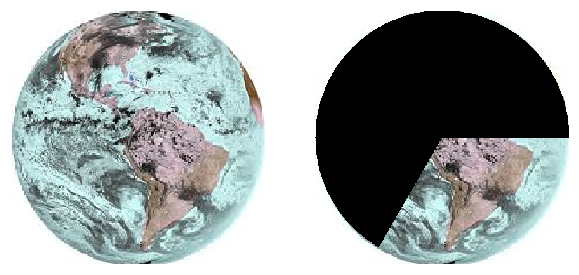

In [89]:
fig,axes = plt.subplots(1,2, figsize=(10,10))
img = cv2.bitwise_not(cv2.imread("data/test/e1t.png"))
axes[0].imshow(img)

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    sns.despine(ax=ax, left=True, bottom=True)

full_img = img.copy()
mask = sector_mask(full_img.shape,(200,200),200,(0,120)) 
copy = img.copy()
copy[mask] = 0

axes[1].imshow(np.where(full_img == 0, full_img, copy))